In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#logfile = 'log_ResNet34_LSTM_experiment.txt'
logfile = 'log_ResNet34_ONLY_experiment.txt'

f = open(logfile)
train_loss = []
val_loss=[]
for line in f:
    s = int(line.find('Loss'))
    p = int(line[s:].find('('))
    if 'Epoch' in line and '][' in line:
        e1 = int(line.find('Epoch: [')) + 8; e2=int(line.find(']'))
        epoch = int(line[e1:e2])
        #print(line[s+5:s+p])
        train_loss.append((float(line[s+5:s+p])))
    elif 'Val/Test' in line:
        val_loss.append((float(line[s+5:s+p])))

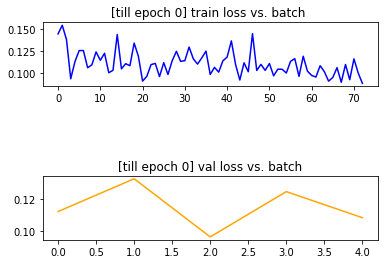

In [24]:
# plot batch loss 
plt.subplot(3, 1,1)
plt.title('[till epoch %d] train loss vs. batch '%int(epoch))
plt.plot(train_loss,'b')

plt.subplot(3, 1, 3)
plt.plot(val_loss,'orange')
plt.title('[till epoch %d] val loss vs. batch'%int(epoch))

plt.show()

In [21]:
# plot epoch loss


In [25]:
epochlogfile = 'epoch_log.txt'

f = open(epochlogfile)
epoch_train_loss = []
epoch_val_loss=[]
for line in f:
    t = int(line.find('Train Loss'))
    v = int(line.find('Val Loss'))
    if 'Epoch' in line:
        e1 = int(line.find('Epoch: [')) + 8; e2=int(line.find(']'))
        epoch = int(line[e1:e2])
        epoch_train_loss.append((float(line[t+11:v])))
        epoch_val_loss.append((float(line[v+11:-1])))

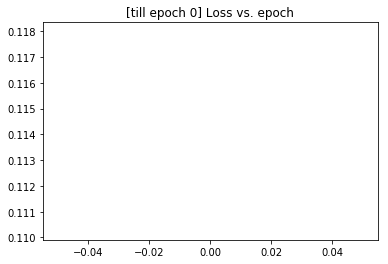

In [23]:
plt.figure()
plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)
plt.title('[till epoch %d] Loss vs. epoch'%epoch)
plt.show()


In [211]:
def get_img_audio_label(dataset_dir,audio_dataset_dir,label_dataset_dir):
    """Returns a list of np.array(img_paths), np.array(audio_paths),np.array(labels), np.array(raw_movienames)
    Args:
    dataset for video, for audio_feats from pyAudioAnalysis, labels
    """
 
    print("processing dataset: "+ dataset_dir)
    img_paths = [] 
    audio_paths=[]
    raw_movienames = []
    labels = []

    annotaion_filename = label_dataset_dir + "/annotation_training.pkl"
    
    with open(annotaion_filename, 'rb') as f:
        label_dicts = pickle.load(f, encoding='latin1') 

    for movie in os.listdir(dataset_dir):
        fileEnding ='_50uniform' #TODO: figure out how to make more general
        if fileEnding not in movie: continue #skip non-movie files
        raw_moviename = movie.replace(fileEnding,'.mp4')
        raw_movienames.append(raw_moviename)
        
        big_five = [label_dicts['extraversion'][raw_moviename], 
                    label_dicts['neuroticism'][raw_moviename],
                    label_dicts['agreeableness'][raw_moviename],
                    label_dicts['conscientiousness'][raw_moviename],
                    label_dicts['openness'][raw_moviename] ]
                    #label_dicts['interview'][raw_moviename]]
        labels.append(big_five)
        
        
        
        
        movie_path = os.path.join(dataset_dir, movie)
        mv_partitions = []
        p = 0
        all_imgs = os.listdir(movie_path)
        assert(len(all_imgs) >= num_partition)
        for i in range(num_partition):
            path = os.path.join(movie_path, all_imgs[i])
            try:
                open(path)
            except:
                print('image failed to open',path)
            mv_partitions.append(path)
        assert(len(mv_partitions)==num_partition)
        img_paths.append(mv_partitions)
        
        audiofeat_path = os.path.join(audio_dataset_dir,raw_moviename+'.wav.csv')
        try:
            open(audiofeat_path)
        except:
            print('image failed to open',path)
        audio_paths.append(audiofeat_path)
            
    
    return np.array(img_paths), np.array(audio_paths),np.array(labels), np.array(raw_movienames)

import pickle
import os


train_dataset_dir = '/home/noa_glaser/dataBig/train-1-2-4/train'
val_dataset_dir = '/home/noa_glaser/dataBig/train-1-2-4/val'
audio_dataset_dir = '/home/noa_glaser/dataBig/train-1-2-4-audio'
label_dataset_dir = train_dataset_dir
num_partition = 10
train_img_paths,train_audio_paths, train_labels, train_movienames = get_img_audio_label(train_dataset_dir,audio_dataset_dir,label_dataset_dir)  
val_img_paths,val_audio_paths, val_labels, val_movienames = get_img_audio_label(val_dataset_dir,audio_dataset_dir,label_dataset_dir)  

processing dataset: /home/noa_glaser/dataBig/train-1-2-4/train
processing dataset: /home/noa_glaser/dataBig/train-1-2-4/val


In [201]:
from PIL import Image
def plot_groundtruth(idx,savefig = False):
    fig = plt.figure(figsize=(44,4))
    for i in range(10):
        img = Image.open(train_img_paths[idx][i])
        plt.subplot(1,11,i+1)
        fig = plt.imshow(img)
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.imshow(img)
    plt.subplot(1,11,11)
    plt.bar(np.arange(5),train_labels[idx])
    plt.xticks(np.arange(5),['e','n','a','c','o'])
    plt.gca().set_ylim([0.0,1.0])
    plt.show()
    if savefig:
        plt.savefig('example%d_train.png'%idx, bbox_inches='tight', pad_inches = 0)



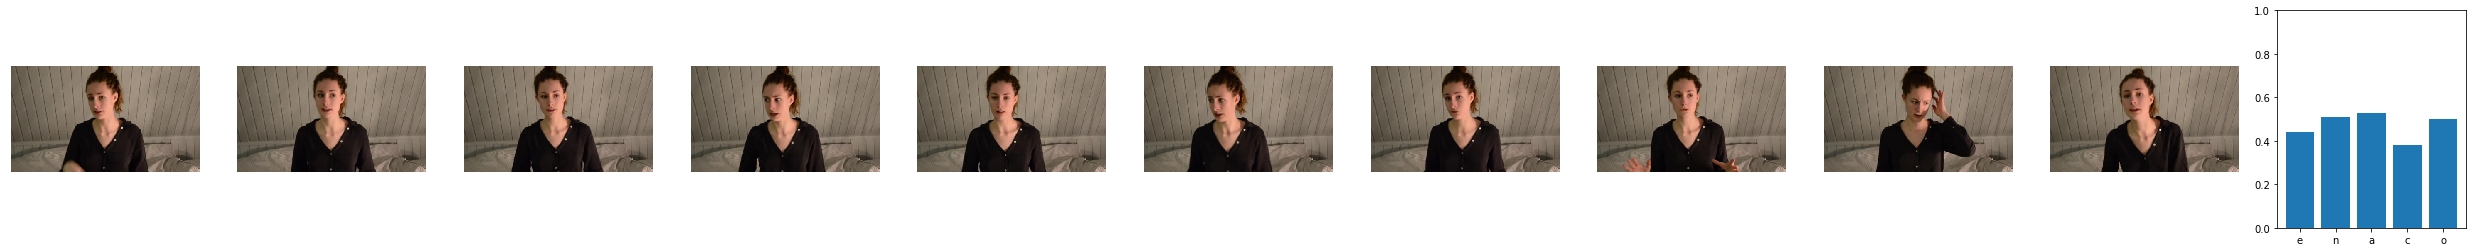

In [180]:
plot_groundtruth(6)

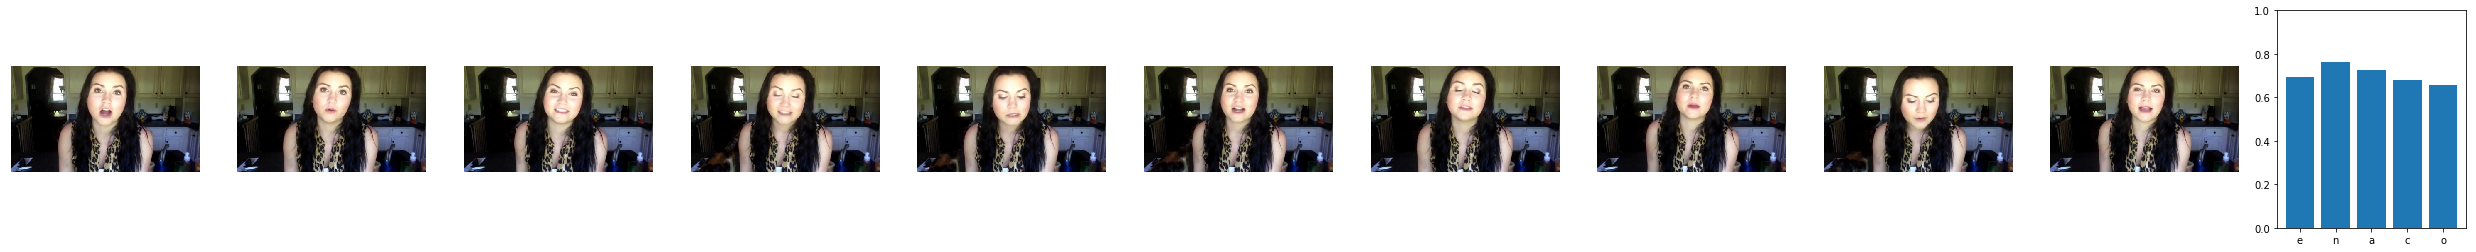

In [181]:
plot_groundtruth(5)